In [1]:
import datetime

### 語音轉成文字檔

In [2]:
# https://markjong001.pixnet.net/blog/post/246140004
# https://www.youtube.com/watch?v=31DZfkYRvI4

# 首先 import 這幾個套件 
import speech_recognition
import time
import os
import pyaudio
import wave              # 這是讀聲音檔的，可以不需要

# # 將聲音轉成文字的fun 只需要這一小段code 
# def Voice_To_Text():
#     r = speech_recognition.Recognizer()
#     with speech_recognition.Microphone() as source: 
#      ## 介紹一下 with XXX as XX 這個指令
#      ## XXX 是一個函數或動作 然後我們把他 的output 放在 XX 裡
#      ## with 是在設定一個範圍 讓本來的 source 不會一直進行
#      ## 簡單的應用，可以參考
#      ## https://blog.gtwang.org/programming/python-with-context-manager-tutorial/
#         print("請開始說話:")                               # print 一個提示 提醒你可以講話了
# #         r.adjust_for_ambient_noise(source)     # 函數調整麥克風的噪音:
#         audio = r.listen(source)
#      ## with 的功能結束 source 會不見 
#      ## 接下來我們只會用到 audio 的結果
#     try:
#         Text = r.recognize_google(audio, language="zh-TW")     
#               ##將剛說的話轉成  zh-TW 繁體中文 的 字串
#               ## recognize_google 指得是使用 google 的api 
#               ## 也就是用google 網站看到的語音辨識啦~~
#               ## 雖然有其他選擇  但人家是大公司哩 當然優先用他的囉
#     except r.UnknowValueError:
#         Text = "無法翻譯"
#     except sr.RequestError as e:
#         Text = "無法翻譯{0}".format(e)
#               # 兩個 except 是當語音辨識不出來的時候 防呆用的 

# #     return Text

# # #太小聲會出錯 UnknownValueError

In [3]:
# Text = Voice_To_Text()
# print(Text)

In [4]:
# r = speech_recognition.Recognizer()

# with speech_recognition.Microphone() as source:
#     audio = r.listen(source)

In [5]:
# r.recognize_google(audio, language="zh-TW") 

### 語音檔(.wav)轉成文字

In [6]:
import speech_recognition as sr
r = sr.Recognizer()                        #預設辨識英文
with sr.WavFile("語音檔\信用卡 001.wav") as source:  #讀取wav檔
    audio = r.record(source)
try:
    print("Transcription: " + r.recognize_google(audio,language="zh-TW"))
                                          #使用Google的服務
except LookupError:
    print("Could not understand audio")
# 會有英文，但是沒有標點符號，注意大小寫問題(已修正)

Transcription: 信用卡最多可以申辦幾張


### 創造 data 以及 label

In [7]:
import pandas as pd
cathay_data = pd.read_excel('test_cathay_data0721.xlsx')
# for i in cathay_data['QUESTION']:
#     print(i)


### 資料前處理 -- jieba 斷詞、去除標點符號、英文轉小寫

In [8]:
import jieba

jieba.set_dictionary('dict.txt.big')
jieba.load_userdict("userdict0722.txt")

Building prefix dict from C:\ANDY\cathay_cip\dict.txt.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.ua06ce282c63fc7f4942dfb0d4b1481f4.cache
Loading model cost 0.927 seconds.
Prefix dict has been built successfully.


In [9]:
cathay_data

,QUESTION,CATEGORY
0,完成開戶申請流程後，是否會提供網銀密碼？如何提供？,數位金融 - 數位存款帳戶
1,透過線上開戶能申辦金融卡嗎？,數位金融 - 數位存款帳戶
2,線上開戶的申請資格是什麼？,數位金融 - 數位存款帳戶
3,當帳戶狀態變成了「待補件」，該如何處理？,數位金融 - 數位存款帳戶
4,數位存款帳戶經審核若狀態為「未正式啟用」或「未正式啟用(補傳證件)」，還可以再另外開立數位存...,數位金融 - 數位存款帳戶
...,...,...
691,請問在網路銀行上是否可執行台外幣換匯交易?,數位金融 - 網路銀行
692,請問在網路銀行辦理台外幣換匯金額限制與轉帳次數限制?,數位金融 - 網路銀行
693,請問網路銀行是否可以辦理國外匯款/大陸匯款交易?,數位金融 - 網路銀行
694,請問網路銀行辦理國外/大陸匯款之手續費如何收取?,數位金融 - 網路銀行


In [10]:
import re

cathay_data['QUESTION_SPLIT'] = [0] * len(cathay_data)
for i in cathay_data['QUESTION']:
    
    #去除標點符號、全部轉為小寫
    reg = "[^0-9A-Za-z\u4e00-\u9fa5]"
    i_without_punctuation = re.sub(reg,'', i)
    i_without_punctuation = i_without_punctuation.lower()
    print(i_without_punctuation)
    
    # jieba
#     print(cathay_data[cathay_data['QUESTION']==i].index.values)
    words = jieba.cut(i_without_punctuation, cut_all=False)
    sentence_split = ''
    for word in words:
        sentence_split += ' ' + word
    cathay_data.loc[cathay_data[cathay_data['QUESTION']==i].index.values, 'QUESTION_SPLIT'] = sentence_split


完成開戶申請流程後是否會提供網銀密碼如何提供
透過線上開戶能申辦金融卡嗎
線上開戶的申請資格是什麼
當帳戶狀態變成了待補件該如何處理
數位存款帳戶經審核若狀態為未正式啟用或未正式啟用補傳證件還可以再另外開立數位存款帳戶嗎
若忘記完成開戶申請後寄送之網銀密碼及用戶代號該如何處理
晶片金融卡寄送地址是以哪個地址為主
若於線上開戶時填錯電子郵件信箱致無法取得網銀密碼和後續指定之開卡資訊該如何處理
若帳戶已審核通過但未收到i刷金融卡該如何處理
數位存款帳戶的i刷金融卡該如何開卡
加密郵件寄送金融卡指定之開卡資訊可以申請幾次忘記密碼該如何處理
透過線上開戶申辦之i刷金融卡開卡後如何掛失或補發
若於線上申請i刷金融卡後又至分行臨櫃申請金融卡會如何處理
透過線上開戶申辦之i刷金融卡可以進行非約定轉帳嗎
數位存款帳戶可透過什麼管道申請
什麼是數位存款帳戶它跟一般存款帳戶有什麼不同
進行線上開戶需要準備什麼資料
可以透過線上開戶開立除了活期儲蓄存款之外的帳戶嗎一個人可以開幾個數位存款帳戶
完成申請流程之後數位存款帳戶就可以使用了嗎
各類客戶的驗證方式為何
為什麼存戶會依是否持有網銀密碼而決定其驗證之方式
為何無法成功使用自然人憑證
輸入生日與身分證號碼後為什麼顯示您輸入的資料與您在本行留存之資料不同請洽客服中心0223831000
為何無法成功使用行動裝置進行證件上傳
以簡訊otp進行線上開戶身分驗證一天至多可發送幾次簡訊
線上開戶暫存資料保留14天輸入到哪個步驟可進行暫存可查詢已失效的檔案嗎
mybank有提供哪些個人提醒通知服務要怎麼設定
網路銀行包括哪些服務範圍提供哪些服務
為什麼密碼不能設定違反規則
如何使用網路銀行或行動銀行轉帳到其他帳戶
網路銀行臺外幣轉帳外幣間轉帳及外幣匯出匯款等外匯交易服務對象
我可以申請網路銀行嗎
什麼是認證密碼鎖
什麼是約定帳戶轉帳非約定帳戶轉帳本人本行帳戶轉帳
客戶資料安全嗎會不會被欄截
有提供email電子帳單或對帳單的服務嗎
如何申請網銀密碼
何時需要使用認證密碼鎖otp
在網路銀行上如何只做查詢並停止轉帳功能如果要恢復轉帳如何辦理
為什麼登入mybank後畫面顯示為亂碼
網路銀行mybank外匯功能是否有營業時間之限制
為什麼沒辦法使用約定帳戶轉帳功能
什麼是用戶代號和網銀密碼登入網路銀行為何這麼麻煩
為什麼沒辦法使用繳費繳稅功能
為什麼要

同一張保單中有多位受益人時應如何辦理
指定他人擔任受益人時是否有贈與稅課徵問題
指定他人擔任受益人時是否有贈與稅課徵問題
遺產傳承信託交付之財產可包含哪些
公益信託與財團法人基金會有何差異
信託期間受益人若身故會被課徵遺產稅嗎
信託期間受益人若身故會被課徵遺產稅嗎
可以同時將多筆保單的保險給付交付信託嗎
遺囑是否一定要公證
申請成立公益信託要向哪個政府單位申請
信託契約何時生效
信託成立後還可以追加財產嗎
將遺產捐贈於公益信託是否可免稅
是否需指定信託監察人其作用為何
什麼是無卡提款如何使用國泰世華銀行無卡提款功能
如何操作atm存提款機
無卡提款交易限額為多少
手機提款在line行動銀行app或koko設定完成手機提款交易設定多久時間內在atm完成提款
手機提款在line行動銀行app或koko上設定完成手機提款交易資訊後可以至其他銀行atm提款嗎
手機提款在line行動銀行app或koko上設定完成一筆手機提款交易資訊後可以再另外新增一筆嗎
我想使用無卡提款服務但是我有多個帳戶需要分別持金融卡至國泰世華銀行atm設定嗎
無卡提款交易設定完成後發現金額或帳號設定錯誤要如何修改
手機提款我要如何在line行動銀行app或koko上查詢設定的無卡提款資料
我要如何查詢前幾天的無卡提款設定資料
操作atm時遇到錯誤訊息怎麼辦
進行無卡提款交易時無卡提款密碼忘記或被鎖怎麼辦
我不想使用無卡提款服務該如何中止使用
我開啟無卡提款功能後金融卡不見並掛失是否還可以使用無卡提款
同一個身分證號最多可以開啟多少個帳號的無卡提款功能
無卡提款服務停用後要如何重新再啟用
人臉提款atm人臉提款申請是否開放非國泰世華銀行金融卡客戶申請
人臉提款如果我有三個國泰世華銀行帳號申請人臉提款時是否可運用不相同的人臉
人臉提款目前哪些atm服務據點可以使用國泰世華人臉提款服務
哪裡可以找到atm及補摺機
atm提款是否有任何額度限制
為什麼atm螢幕會顯示本國卡外國卡
銀聯卡於國泰世華atm提領有沒有任何金額限制
台幣電子存單是否可以透過atm開立
atm是否可以無卡存款
atm存款多久會入帳
atm無卡存款有沒有任何限制
存款機是否有存入的金額限制
國外銀行金融卡能不能用國泰atm提領
mybill輕鬆繳提供什麼樣的服務
在mybill輕鬆繳可繳哪些帳單
透過mybill輕鬆繳繳費有何好處呢
在

In [11]:
cathay_data.loc[[0,1,51,100,150,200,250,300,351,695]].rename(columns={
    "QUESTION": "斷詞前", "CATEGORY": "分類", 
    "QUESTION_SPLIT": "斷詞後"})

,斷詞前,分類,斷詞後
0,完成開戶申請流程後，是否會提供網銀密碼？如何提供？,數位金融 - 數位存款帳戶,完成 開戶 申請 流程 後 是否 會 提供 網銀 密碼 如何 提供
1,透過線上開戶能申辦金融卡嗎？,數位金融 - 數位存款帳戶,透過 線上 開戶 能 申辦 金融卡 嗎
51,客戶如何申請使用網路銀行（MyBank）外匯匯出匯款功能？,數位金融 - 網路銀行,客戶 如何 申請 使用 網路 銀行 mybank 外匯 匯出 匯款 功能
100,推播通知訊息可以保存多久？我能自行刪除嗎？,數位金融 - 行動銀行,推播 通知 訊息 可以 保存 多久 我能 自行 刪除 嗎
150,基金每個月扣款幾次?,基金投資,基金 每個 月 扣款 幾次
200,信用卡待繳付金額可以轉成信貸嗎？,貸款,信用卡 待 繳付 金額 可以 轉成 信貸 嗎
250,為什麼無法設定路邊停車費代繳?,信用卡,為 什麼 無法 設定 路邊 停車費 代繳
300,雙幣卡外幣最低的應繳金額是如何計算的?,信用卡,雙幣卡 外幣 最低 的 應繳 金額 是 如何 計算 的
351,透過國泰世華LINE個人化服務進行信用卡繳費，有金額上的限制嗎？,數位金融 - LINE個人化服務,透過 國泰 世華 line 個人化 服務 進行 信用卡 繳費 有 金額 上 的 限制 嗎
695,請問在網路銀行辦理台外幣換匯交易的時間?,數位金融 - 網路銀行,請問 在 網路 銀行 辦理 台外幣 換匯 交易 的 時間


In [12]:
# # jieba 自製 user_dict
for index, row in cathay_data.iterrows():
    print(row.QUESTION)
    print(row.QUESTION_SPLIT)
    print()

完成開戶申請流程後，是否會提供網銀密碼？如何提供？
 完成 開戶 申請 流程 後 是否 會 提供 網銀 密碼 如何 提供

透過線上開戶能申辦金融卡嗎？
 透過 線上 開戶 能 申辦 金融卡 嗎

線上開戶的申請資格是什麼？
 線上 開戶 的 申請 資格 是 什麼

當帳戶狀態變成了「待補件」，該如何處理？
 當 帳戶 狀態 變成 了 待補件 該 如何 處理

數位存款帳戶經審核若狀態為「未正式啟用」或「未正式啟用(補傳證件)」，還可以再另外開立數位存款帳戶嗎？
 數位 存款 帳戶 經審 核若 狀態 為 未 正式 啟用 或 未 正式 啟用 補傳 證件 還 可以 再 另外 開立 數位 存款 帳戶 嗎

若忘記完成開戶申請後寄送之網銀密碼及用戶代號，該如何處理？
 若 忘記 完成 開戶 申請 後 寄送 之 網銀 密碼 及 用戶 代號 該 如何 處理

晶片金融卡寄送地址是以哪個地址為主？
 晶片 金融卡 寄送 地址 是 以 哪個 地址 為主

若於線上開戶時填錯電子郵件信箱，致無法取得網銀密碼和後續指定之開卡資訊該如何處理？
 若於 線上 開戶 時填錯 電子郵件 信箱 致 無法 取得 網銀 密碼 和 後續 指定 之 開卡 資訊 該 如何 處理

若帳戶已審核通過但未收到i刷金融卡該如何處理？
 若 帳戶 已 審核 通過 但 未 收到 i刷 金融卡 該 如何 處理

數位存款帳戶的i刷金融卡該如何開卡？
 數位 存款 帳戶 的 i刷 金融卡 該 如何 開卡

加密郵件寄送金融卡指定之開卡資訊，可以申請幾次？忘記密碼該如何處理？
 加密 郵件 寄送 金融卡 指定 之 開卡 資訊 可以 申請 幾次 忘記 密碼 該 如何 處理

透過線上開戶申辦之i刷金融卡開卡後如何掛失或補發？
 透過 線上 開戶 申辦 之 i刷 金融卡 開卡 後 如何 掛失 或 補發

若於線上申請i刷金融卡後又至分行臨櫃申請，金融卡會如何處理？
 若於 線上 申請 i刷 金融卡 後 又 至 分行 臨櫃 申請 金融卡 會 如何 處理

透過線上開戶申辦之i刷金融卡可以進行非約定轉帳嗎？
 透過 線上 開戶 申辦 之 i刷 金融卡 可以 進行 非 約定 轉帳 嗎

數位存款帳戶可透過什麼管道申請？
 數位 存款 帳戶 可 透過 什麼 管道 申請

什麼是數位存款帳戶，它跟一般存款帳戶有什麼不同？
 什麼 是 

In [13]:
# #encoding=utf-8
# import jieba

# jieba.set_dictionary('dict.txt.big')

# sentence = cathay_data['QUESTION']
# sentence = '完成開戶申請流程後，是否會提供網銀密碼？如何提供？'
# print("Input：", sentence)
# words = jieba.cut(sentence, cut_all=False)
# print("Output 精確模式 Full Mode：")
# print(words)
# for word in words:
#     print(word)


### 切換訓練集、測試集

In [14]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(cathay_data['QUESTION'], cathay_data['CATEGORY'],test_size=0.2)
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
training_sentences,testing_sentences,training_labels,testing_labels = train_test_split(cathay_data['QUESTION_SPLIT'], cathay_data['CATEGORY'],test_size=0.2)
print(training_sentences.shape,testing_sentences.shape,training_labels.shape,testing_labels.shape)
# type <class 'pandas.core.series.Series'>

(556,) (140,) (556,) (140,)


### tokenlize

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle


In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 20
trunc_type='post'
padding_type='post' # 0 加在尾端
oov_tok = "<OOV>"

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
tokenizer.word_index

{'<OOV>': 1,
 '如何': 2,
 '的': 3,
 '嗎': 4,
 '銀行': 5,
 '申請': 6,
 '使用': 7,
 '可以': 8,
 '我': 9,
 '信用卡': 10,
 '網路': 11,
 '什麼': 12,
 '有': 13,
 '是否': 14,
 'atm': 15,
 '交易': 16,
 '轉帳': 17,
 '或': 18,
 '在': 19,
 '需要': 20,
 '是': 21,
 '會': 22,
 '請問': 23,
 '服務': 24,
 '國泰': 25,
 '該': 26,
 '世華': 27,
 '帳戶': 28,
 '為': 29,
 '要': 30,
 '行動': 31,
 '後': 32,
 '辦理': 33,
 '金融卡': 34,
 '提款': 35,
 '基金': 36,
 '怎麼辦': 37,
 '哪些': 38,
 '金額': 39,
 '密碼': 40,
 '卡片': 41,
 '限制': 42,
 'app': 43,
 '帳單': 44,
 '繳費': 45,
 '設定': 46,
 '透過': 47,
 '呢': 48,
 '對帳單': 49,
 '上': 50,
 '之': 51,
 '了': 52,
 '為何': 53,
 '通知': 54,
 '計算': 55,
 '自動': 56,
 '與': 57,
 '可': 58,
 '查詢': 59,
 '時': 60,
 '提供': 61,
 'fitbitpay': 62,
 '功能': 63,
 '卡': 64,
 '費用': 65,
 '重新': 66,
 '外幣': 67,
 '消費': 68,
 'line': 69,
 '電子': 70,
 'hamipay': 71,
 '時間': 72,
 '多久': 73,
 '手續費': 74,
 '變更': 75,
 '綜合': 76,
 '錯誤': 77,
 '手機': 78,
 '及': 79,
 '人臉': 80,
 '國外': 81,
 '存款': 82,
 '完成': 83,
 'i刷': 84,
 '繳款': 85,
 '收到': 86,
 '已': 87,
 '無法': 88,
 '訊息': 89,
 '輸入': 90,
 '雙幣卡': 91,
 '額度'

In [19]:
# print(tokenizer.word_index.keys())
for i in tokenizer.word_index.keys():
    print(i)

<OOV>
如何
的
嗎
銀行
申請
使用
可以
我
信用卡
網路
什麼
有
是否
atm
交易
轉帳
或
在
需要
是
會
請問
服務
國泰
該
世華
帳戶
為
要
行動
後
辦理
金融卡
提款
基金
怎麼辦
哪些
金額
密碼
卡片
限制
app
帳單
繳費
設定
透過
呢
對帳單
上
之
了
為何
通知
計算
自動
與
可
查詢
時
提供
fitbitpay
功能
卡
費用
重新
外幣
消費
line
電子
hamipay
時間
多久
手續費
變更
綜合
錯誤
手機
及
人臉
國外
存款
完成
i刷
繳款
收到
已
無法
訊息
輸入
雙幣卡
額度
線上
開戶
申辦
裝置
處理
信用
我要
補發
申購
資料
能
如果
入帳
取消
認證
信託
贖回
任何
認證碼
多少
哪裡
加入
無卡
扣款
安全
約定
附卡
沒有
掛失
若
出現
開立
將
到
進行
mybill
輕鬆繳
定存
個人化
忘記
指定
顯示
密碼鎖
扣繳
何時
開卡
支援
跨行
驗證
悠遊
時候
限額
被
不同
mybank
台幣
怎麼
那些
以
已經
簡訊
預約
想
晶片
房貸
應
遺失
紀錄
非
於
推播
登入
您
最
問題
用
寄送
匯款
繳納
收取
有何
增貸
網銀
準備
提領
不能
投資
分期
幾次
刷卡
證明
到期
外匯
即時
本行
不
可否
餘額
etf
收費
多
人
一定
卡費
等
分行
元件
還
毀損
受益人
讀卡機
電腦
資訊
地址
方式
海
外債
劵
同時
現金
還有
數位
安裝
和
失敗
會員
終止
業務
代
日期
開啟
利率
身分證
啟用
付款
臉
辨識
債務
協商
條件
旅遊
刷
更換
信貸
現鈔
貸款
koko
課徵
才能
屬性
點數
同
加值
一筆
現在
期限
期間
預借
都
代繳
帳號
成功
其他
保存
提醒
還是
紙本
解約
利息
代扣
事業費
儲值
生效
只
淨值
資格
沒
辦法
轉置
幣別
公會
擁有
多個
多張
存單
理財
定期
定額
新
更新
目前
月
項目
哪個
需
用戶
代號
才
單位
他人
時該
文件
有沒有
規則
紅利
自行
聯名卡
操作
表
彈性
再
記錄
跟
發生
至
分析
實體
退貨
畫面
去
下載
一直
原
明細
註冊
什麼樣
客戶
公益
年費
修改
狀態
寄
不見
聯徵
新版
停卡
但
一般
並
續卡
卡號
otp
卻
使用者
代碼
公用
他

In [20]:
# transfer labels to num
label_index_dict = {
    '數位金融 - 數位存款帳戶': 0,
    '數位金融 - 網路銀行': 1,
    '數位金融 - 行動銀行': 2,
    '數位金融 - LINE個人化服務': 3,
    '數位金融 - 網路ATM': 4,
    '行動支付 - Fitbit Pay': 5,
    '行動支付 - Hami Pay': 6,
    '基金投資': 7,
    '貸款': 8,
    '信託': 9,
    'ATM相關服務': 10,
    '信用卡': 11,
    '綜合對帳單': 12,
    'MyBill 輕鬆繳': 13,
    '存款帳戶': 14,
    0: '數位金融 - 數位存款帳戶',
    1: '數位金融 - 網路銀行',
    2: '數位金融 - 行動銀行',
    3: '數位金融 - LINE個人化服務',
    4: '數位金融 - 網路ATM',
    5: '行動支付 - Fitbit Pay',
    6: '行動支付 - Hami Pay',
    7: '基金投資',
    8: '貸款',
    9: '信託',
    10: 'ATM相關服務',
    11: '信用卡',
    12: '綜合對帳單',
    13: 'MyBill 輕鬆繳',
    14: '存款帳戶',
}
training_labels = [label_index_dict[i] for i in training_labels]
testing_labels =  [label_index_dict[i] for i in testing_labels]

In [21]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [22]:
print(training_sentences)
print(training_padded)
print(training_labels)

93             我 已 申請 非 約定 轉帳 服務 為何 還是 無法 於 行動 銀行 app 轉帳
135                       我 可以 設定 多台 行動 裝置 接收 推播 通知 訊息 嗎
350     只有 國泰 世華 信用卡 附卡 且 沒有 帳戶 可以 申請 國泰 世華 line 個人化 ...
602                                      如何 申請 電子 綜合 對帳單
40                     網路 銀行 mybank 外匯 功能 是否 有 營業時間 之 限制
                             ...                        
674                  請問 網路 銀行 可以 辦理 國內 跨行 轉帳 手續費 是 多少 金額
404                     atm 讀卡機 驅動程式 光 碟片 不見 了 無法 安裝 怎麼辦
272                        搭乘 交通工具 遇到 悠遊 卡 扣款 異常 該 怎麼 處理
529                                     卡片 如果 到期 了 要 怎麼辦
120             使用 交易 認證碼 交易 認證 時為 何會 沒 跳出 密碼 輸入 頁 導致 失敗
Name: QUESTION_SPLIT, Length: 556, dtype: object
[[   9   87    6 ...    0    0    0]
 [   9    8   46 ...    0    0    0]
 [ 494   25   27 ...    0    0    0]
 ...
 [1015  383  403 ...    0    0    0]
 [  41  104  184 ...    0    0    0]
 [   7   16  111 ...    0    0    0]]
[ 2  2  3 12  1  4  1 11 11 14 10 11  6 11  1  1  1 11 11 11  9 11  0  8
  4  7  1  4  3  2  4  

In [23]:
print(training_padded[0])

[  9  87   6 161 118  17  24  53 258  88 162  31   5  43  17   0   0   0
   0   0]


### SVM

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score
# SVM
from sklearn import svm
svm = svm.LinearSVC()
svm.fit(training_padded, training_labels)
y_test_predicted_svm = svm.predict(testing_padded)
accuracy = accuracy_score(testing_labels, y_test_predicted_svm)
print('Accuracy using SVM: %.3f\n\n' % (accuracy,))

Accuracy using SVM: 0.179




C:\Users\user\anaconda3\envs\tensorflow36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

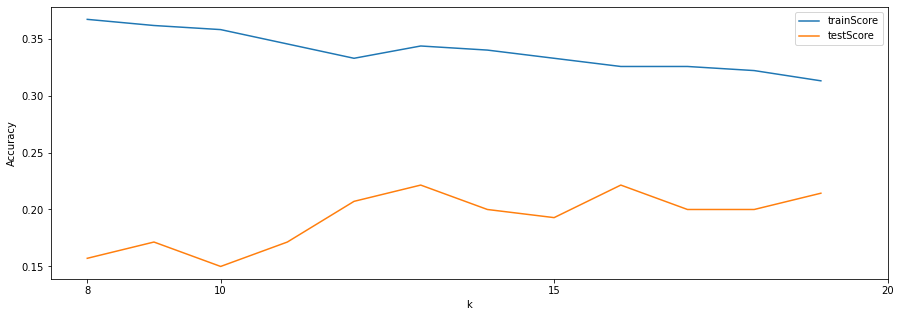

Accuracy using KNN: 0.221




In [25]:
# KNN(K-neighbors)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
y_test_predicted_knns = {}
k_range = range(8,20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(training_padded, training_labels)
    train_scores.append(knn.score(training_padded, training_labels))
    test_scores.append(knn.score(testing_padded, testing_labels))
    y_test_predicted_knns[knn.score(testing_padded, testing_labels)] = knn.predict(testing_padded)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('k')
ax1.set_ylabel('Accuracy')
ax1.plot(k_range, train_scores, label='trainScore')
ax1.plot(k_range, test_scores, label='testScore')
ax1.set_xticks([8,10,15,20])
ax1.legend(loc=1)
plt.show()
print('Accuracy using KNN: %.3f\n\n' % (test_scores[np.argmax(test_scores)],))
# 紀錄最佳的 y_test_predicted_knn
y_test_predicted_knn = y_test_predicted_knns[test_scores[np.argmax(test_scores)]]

### NN

In [26]:
import tensorflow as tf
# https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb#scrollTo=3u8UB0MCkZ5N

In [27]:
# profile a single batch, e.g. the 5th batch.

tf.keras.backend.clear_session()

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
#                                                       profile_batch=5)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4), # 關健在dropout
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=8e-3),metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                2340      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                555       
Total params: 163,983
Trainable params: 163,983
Non-trainable params: 0
__________________________________________________

In [29]:
num_epochs = 300
beginTime = datetime.datetime.now()

history = model.fit(training_padded, training_labels, epochs=num_epochs, batch_size=32, validation_data=(testing_padded, testing_labels), verbose=2,)# callbacks=[lr_schedule,]) # , callbacks=[tensorboard_callback,]
endTime = datetime.datetime.now()
print("Total time is : %s" % (endTime-beginTime,))
model.save('./models/nn_model.h5')  # 儲存模型，creates a HDF5 file 

Epoch 1/300
18/18 - 0s - loss: 2.5090 - accuracy: 0.2680 - val_loss: 2.3655 - val_accuracy: 0.2500
Epoch 2/300
18/18 - 0s - loss: 2.2938 - accuracy: 0.2788 - val_loss: 2.2712 - val_accuracy: 0.2500
Epoch 3/300
18/18 - 0s - loss: 2.0613 - accuracy: 0.3004 - val_loss: 2.1183 - val_accuracy: 0.3071
Epoch 4/300
18/18 - 0s - loss: 1.8173 - accuracy: 0.3759 - val_loss: 1.9080 - val_accuracy: 0.3571
Epoch 5/300
18/18 - 0s - loss: 1.5504 - accuracy: 0.4820 - val_loss: 1.7351 - val_accuracy: 0.3929
Epoch 6/300
18/18 - 0s - loss: 1.2744 - accuracy: 0.5468 - val_loss: 1.5704 - val_accuracy: 0.5000
Epoch 7/300
18/18 - 0s - loss: 0.9798 - accuracy: 0.6619 - val_loss: 1.5306 - val_accuracy: 0.5071
Epoch 8/300
18/18 - 0s - loss: 0.7355 - accuracy: 0.7284 - val_loss: 1.4794 - val_accuracy: 0.5786
Epoch 9/300
18/18 - 0s - loss: 0.5882 - accuracy: 0.7644 - val_loss: 1.5088 - val_accuracy: 0.5929
Epoch 10/300
18/18 - 0s - loss: 0.5011 - accuracy: 0.8040 - val_loss: 1.5773 - val_accuracy: 0.5857
Epoch 11/

Epoch 84/300
18/18 - 0s - loss: 0.0201 - accuracy: 0.9928 - val_loss: 2.6258 - val_accuracy: 0.6571
Epoch 85/300
18/18 - 0s - loss: 0.0317 - accuracy: 0.9892 - val_loss: 2.4634 - val_accuracy: 0.6643
Epoch 86/300
18/18 - 0s - loss: 0.0158 - accuracy: 0.9946 - val_loss: 2.1339 - val_accuracy: 0.6714
Epoch 87/300
18/18 - 0s - loss: 0.0286 - accuracy: 0.9856 - val_loss: 2.3159 - val_accuracy: 0.7143
Epoch 88/300
18/18 - 0s - loss: 0.0432 - accuracy: 0.9820 - val_loss: 2.8209 - val_accuracy: 0.6143
Epoch 89/300
18/18 - 0s - loss: 0.0554 - accuracy: 0.9820 - val_loss: 2.4648 - val_accuracy: 0.6857
Epoch 90/300
18/18 - 0s - loss: 0.0388 - accuracy: 0.9892 - val_loss: 2.5263 - val_accuracy: 0.6714
Epoch 91/300
18/18 - 0s - loss: 0.0307 - accuracy: 0.9892 - val_loss: 2.3158 - val_accuracy: 0.6643
Epoch 92/300
18/18 - 0s - loss: 0.0273 - accuracy: 0.9856 - val_loss: 2.3855 - val_accuracy: 0.6714
Epoch 93/300
18/18 - 0s - loss: 0.0220 - accuracy: 0.9910 - val_loss: 2.1930 - val_accuracy: 0.6857


Epoch 166/300
18/18 - 0s - loss: 0.0264 - accuracy: 0.9946 - val_loss: 3.1783 - val_accuracy: 0.6643
Epoch 167/300
18/18 - 0s - loss: 0.0149 - accuracy: 0.9928 - val_loss: 3.5299 - val_accuracy: 0.6714
Epoch 168/300
18/18 - 0s - loss: 0.0108 - accuracy: 0.9946 - val_loss: 3.5536 - val_accuracy: 0.6500
Epoch 169/300
18/18 - 0s - loss: 0.0110 - accuracy: 0.9964 - val_loss: 3.3818 - val_accuracy: 0.6500
Epoch 170/300
18/18 - 0s - loss: 0.0114 - accuracy: 0.9928 - val_loss: 3.2115 - val_accuracy: 0.6714
Epoch 171/300
18/18 - 0s - loss: 0.0163 - accuracy: 0.9946 - val_loss: 3.2365 - val_accuracy: 0.7000
Epoch 172/300
18/18 - 0s - loss: 0.0335 - accuracy: 0.9892 - val_loss: 3.5711 - val_accuracy: 0.6429
Epoch 173/300
18/18 - 0s - loss: 0.0310 - accuracy: 0.9892 - val_loss: 3.5799 - val_accuracy: 0.6143
Epoch 174/300
18/18 - 0s - loss: 0.0357 - accuracy: 0.9874 - val_loss: 3.5492 - val_accuracy: 0.6214
Epoch 175/300
18/18 - 0s - loss: 0.0142 - accuracy: 0.9928 - val_loss: 3.3556 - val_accurac

Epoch 248/300
18/18 - 0s - loss: 0.0211 - accuracy: 0.9892 - val_loss: 4.3548 - val_accuracy: 0.6714
Epoch 249/300
18/18 - 0s - loss: 0.0301 - accuracy: 0.9856 - val_loss: 4.6464 - val_accuracy: 0.6857
Epoch 250/300
18/18 - 0s - loss: 0.0340 - accuracy: 0.9892 - val_loss: 4.6020 - val_accuracy: 0.6500
Epoch 251/300
18/18 - 0s - loss: 0.0368 - accuracy: 0.9856 - val_loss: 4.1358 - val_accuracy: 0.6714
Epoch 252/300
18/18 - 0s - loss: 0.0417 - accuracy: 0.9892 - val_loss: 5.4689 - val_accuracy: 0.6357
Epoch 253/300
18/18 - 0s - loss: 0.0270 - accuracy: 0.9910 - val_loss: 4.5452 - val_accuracy: 0.6643
Epoch 254/300
18/18 - 0s - loss: 0.0322 - accuracy: 0.9874 - val_loss: 3.9222 - val_accuracy: 0.6357
Epoch 255/300
18/18 - 0s - loss: 0.0464 - accuracy: 0.9892 - val_loss: 4.0243 - val_accuracy: 0.6429
Epoch 256/300
18/18 - 0s - loss: 0.0093 - accuracy: 0.9946 - val_loss: 3.8819 - val_accuracy: 0.6429
Epoch 257/300
18/18 - 0s - loss: 0.0168 - accuracy: 0.9874 - val_loss: 3.5112 - val_accurac

In [30]:
# LR調參
# 1.
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# 2.callback add lr_schedule
# 3.
# lrs = 1e-8 * (10 ** (np.arange(150) / 20))
# plt.semilogx(lrs, history.history["loss"])
# plt.axis([1e-8, 1e-3, 0, 10]) # not this line
# 4. change the learning rate by using the lowest one

### 分析預測錯誤的句子

In [31]:
y_test_predicted_nn = []
sentences_probabilities = model.predict(testing_padded)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_nn.append(index)
            break
y_test_predicted_nn = np.array(y_test_predicted_nn)
print(y_test_predicted_nn)

[ 4  0  1 14 13  7  1  0  7 11 10  1 14 11  2  8  1  7 14 10 11  2 11 11
 14  6  8  1 11  2  4 11  1  9  7  5  7 13 11  8  2  1  5  2 11  5 11  5
  6  2  6  6  1  2  5  2  7  5  5 11  8 10  8 14  0 11 11  1  1  1  2 11
  2 14  2 10 11 11 11  4  2  6 11  7 11  6  1  1  5  2  2  7  2  6  7 11
 11  4  1 11  4  1  1  2 11  2 11  5  1 11  2  1 11 12  7  1  7  1 11  4
  8  7 10 14 11 11  5  8  8  1  1  1 14  0  4 11  6 11 11  1]


In [32]:
# 驗證正確性
correctCount = 0
falseCount = 0
for a,b in zip(testing_labels, y_test_predicted_nn):
    if a==b:
        correctCount +=1
    else:
        falseCount +=1
print(correctCount / (correctCount + falseCount))

0.7071428571428572


In [33]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict = [label_index_dict[i] for i in y_test_predicted_nn]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER': testing_category_predict,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER'])

compare_diff_df

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
390,有 顯示 正確 的 讀卡機 型號 為 什麼 不能 使用 網路 atm 智慧 卡 服務 未 啟動,數位金融 - 網路ATM,數位金融 - 網路ATM
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶
46,為 什麼 國泰 世華 銀行 認證 密碼鎖 otp 是 全國 最 安全 的 網路 交易,數位金融 - 網路銀行,數位金融 - 網路銀行
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,存款帳戶
347,任何人 都 可以 在 國泰 世華 line 官方 帳號 使用 繳費 功能 嗎 有 哪些 繳...,數位金融 - LINE個人化服務,MyBill 輕鬆繳
...,...,...,...
519,信用卡 可用 餘額 不足 時 如何 申請 調 高 信用 額度,信用卡,信用卡
420,hamipay 交易 是否 需 螢幕 解鎖,行動支付 - Hami Pay,行動支付 - Hami Pay
517,卡片 不用 了 要 如何 辦理 停卡,信用卡,信用卡
547,我 的 帳單 上 有 溢 繳款 要 如何 處理,信用卡,信用卡


In [34]:
compare_diff_df.loc[compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER']]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,存款帳戶
347,任何人 都 可以 在 國泰 世華 line 官方 帳號 使用 繳費 功能 嗎 有 哪些 繳...,數位金融 - LINE個人化服務,MyBill 輕鬆繳
265,電話 或 網路 銀行 預借 現金 的 撥款 時間,信用卡,數位金融 - 網路銀行
592,如何 了解 我 現在 的 貸款 餘額 及 繳款 狀況,貸款,信用卡
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,存款帳戶
575,附卡 可 使用 貴賓室 服務 嗎,信用卡,行動支付 - Fitbit Pay
197,我 可以 指定 信貸 撥款 日期 嗎,貸款,信用卡
442,如何 查詢 行動 卡號 即 虛擬 卡號 資料,行動支付 - Hami Pay,行動支付 - Fitbit Pay
4,數位 存款 帳戶 經審 核若 狀態 為 未 正式 啟用 或 未 正式 啟用 補傳 證件 還...,數位金融 - 數位存款帳戶,數位金融 - 行動銀行


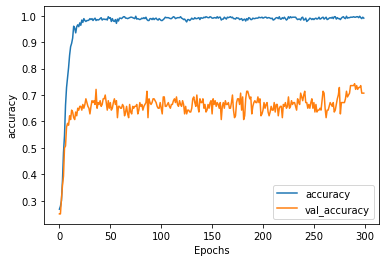

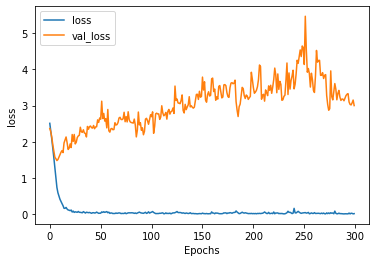

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 分析給出 3 個最可能結果

In [36]:
import heapq
top_three_nn = []
sentences_probabilities = model.predict(testing_padded)
for sentence_probablities in sentences_probabilities:
    sentence_top_three = heapq.nlargest(3, zip(sentence_probablities.tolist(), list(range(len(sentence_probablities.tolist())))))
    temp = []
    for i in sentence_top_three:
        temp.append(i[1])
    top_three_nn.append(temp)
print(top_three_nn)

[[4, 1, 10], [0, 14, 7], [1, 4, 2], [14, 1, 4], [13, 3, 4], [7, 11, 14], [1, 11, 7], [0, 10, 14], [7, 11, 1], [11, 8, 7], [10, 14, 4], [1, 4, 2], [14, 0, 9], [11, 8, 7], [2, 10, 5], [8, 14, 1], [1, 11, 4], [7, 14, 1], [14, 8, 11], [10, 0, 14], [11, 1, 6], [2, 10, 1], [11, 1, 7], [11, 8, 1], [14, 0, 9], [6, 9, 5], [8, 9, 14], [1, 11, 4], [11, 8, 1], [2, 10, 14], [4, 1, 10], [11, 8, 7], [1, 4, 11], [9, 8, 6], [7, 14, 2], [5, 6, 14], [7, 14, 0], [13, 9, 4], [11, 8, 1], [8, 14, 11], [2, 10, 4], [1, 4, 11], [5, 6, 3], [2, 14, 7], [11, 8, 7], [5, 0, 2], [11, 8, 7], [5, 0, 6], [6, 9, 5], [2, 1, 10], [6, 9, 5], [6, 5, 11], [1, 11, 4], [2, 1, 7], [5, 6, 13], [2, 1, 7], [7, 0, 14], [5, 6, 13], [5, 6, 0], [11, 7, 6], [8, 9, 14], [10, 4, 14], [8, 9, 14], [14, 4, 10], [0, 14, 5], [11, 8, 7], [11, 1, 7], [1, 11, 4], [1, 4, 2], [1, 14, 11], [2, 10, 5], [11, 1, 7], [2, 10, 5], [14, 1, 4], [2, 10, 5], [10, 14, 4], [11, 1, 14], [11, 8, 1], [11, 1, 7], [4, 10, 1], [2, 7, 1], [6, 11, 7], [11, 8, 7], [7, 1

In [37]:
# 驗證正確性
correctCount = 0
falseCount = 0
for a,b in zip(testing_labels, top_three_nn):
    if a in b:
        correctCount += 1
    else:
        falseCount += 1
print("nn 三個選項的分類正確率為: %f " % (correctCount / (correctCount + falseCount),))

nn 三個選項的分類正確率為: 0.928571 


In [38]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict1 = [label_index_dict[i[0]] for i in top_three_nn]
testing_category_predict2 = [label_index_dict[i[1]] for i in top_three_nn]
testing_category_predict3 = [label_index_dict[i[2]] for i in top_three_nn]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER1': testing_category_predict1,
        'PREDICT_ANSWER2': testing_category_predict2,
        'PREDICT_ANSWER3': testing_category_predict3,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER1','PREDICT_ANSWER2','PREDICT_ANSWER3'])

# compare_diff_df # 完整testing dataframe

In [39]:
compare_diff_df.loc[(compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER1']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER2']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER3'])]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER1,PREDICT_ANSWER2,PREDICT_ANSWER3
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,存款帳戶,數位金融 - 數位存款帳戶,信託
575,附卡 可 使用 貴賓室 服務 嗎,信用卡,行動支付 - Fitbit Pay,行動支付 - Hami Pay,存款帳戶
4,數位 存款 帳戶 經審 核若 狀態 為 未 正式 啟用 或 未 正式 啟用 補傳 證件 還...,數位金融 - 數位存款帳戶,數位金融 - 行動銀行,存款帳戶,基金投資
279,i刷 金融卡 可以 動用 保單 貸款 嗎,信用卡,貸款,信託,存款帳戶
139,若 密碼 輸入 正確 但 無法 成功 完成 交易,數位金融 - 行動銀行,數位金融 - 數位存款帳戶,存款帳戶,行動支付 - Fitbit Pay
360,可以 設定 常用 的 卡片 嗎,行動支付 - Fitbit Pay,信用卡,數位金融 - 網路銀行,基金投資
52,網銀 密碼 或 用戶 代號 輸入 錯誤 導致 失效 無法 登 入網 路 銀行 怎麼辦,數位金融 - 網路銀行,數位金融 - 行動銀行,ATM相關服務,行動支付 - Fitbit Pay
205,一定 要 到 國泰 世華 銀行 分行 據點 才能 申請 信貸 嗎,貸款,信用卡,數位金融 - 網路銀行,基金投資
574,如何 使用 道路 救援 服務,信用卡,數位金融 - 網路銀行,數位金融 - 網路ATM,數位金融 - 行動銀行
385,如果 忘記 手錶 的 四位數 密碼 該 如何 重設,行動支付 - Fitbit Pay,信用卡,行動支付 - Hami Pay,貸款


In [40]:
del model

### LSTM

In [41]:
# profile a single batch, e.g. the 5th batch.
tf.keras.backend.clear_session()

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
#                                                       profile_batch=5)

modelLSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.75), # 關健在dropout
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

modelLSTM.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-2),metrics=['accuracy'])

In [42]:
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 15)                975       
Total params: 173,519
Trainable params: 173,519
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 300 
beginTime = datetime.datetime.now()

history = modelLSTM.fit(training_padded, training_labels, epochs=num_epochs, batch_size=32, validation_data=(testing_padded, testing_labels), verbose=2,) # , callbacks=[tensorboard_callback,]
endTime = datetime.datetime.now()
print("Total time is : %s" % (endTime-beginTime,))
modelLSTM.save('./models/lstm_model.h5')  # 儲存模型，creates a HDF5 file 

Epoch 1/300
18/18 - 1s - loss: 2.5173 - accuracy: 0.2518 - val_loss: 2.3171 - val_accuracy: 0.2500
Epoch 2/300
18/18 - 0s - loss: 2.1303 - accuracy: 0.3363 - val_loss: 2.2568 - val_accuracy: 0.2571
Epoch 3/300
18/18 - 0s - loss: 1.7691 - accuracy: 0.4281 - val_loss: 1.7039 - val_accuracy: 0.4714
Epoch 4/300
18/18 - 0s - loss: 1.4425 - accuracy: 0.5180 - val_loss: 1.4494 - val_accuracy: 0.5643
Epoch 5/300
18/18 - 0s - loss: 1.2008 - accuracy: 0.6259 - val_loss: 1.4791 - val_accuracy: 0.5500
Epoch 6/300
18/18 - 0s - loss: 1.0684 - accuracy: 0.6565 - val_loss: 1.3177 - val_accuracy: 0.6214
Epoch 7/300
18/18 - 0s - loss: 0.9060 - accuracy: 0.7032 - val_loss: 1.1259 - val_accuracy: 0.6214
Epoch 8/300
18/18 - 0s - loss: 0.7422 - accuracy: 0.7428 - val_loss: 1.2369 - val_accuracy: 0.6429
Epoch 9/300
18/18 - 0s - loss: 0.5923 - accuracy: 0.7950 - val_loss: 1.0370 - val_accuracy: 0.6643
Epoch 10/300
18/18 - 0s - loss: 0.5203 - accuracy: 0.8255 - val_loss: 1.1954 - val_accuracy: 0.6214
Epoch 11/

18/18 - 0s - loss: 0.1034 - accuracy: 0.9658 - val_loss: 1.9826 - val_accuracy: 0.6786
Epoch 84/300
18/18 - 0s - loss: 0.0798 - accuracy: 0.9766 - val_loss: 2.0138 - val_accuracy: 0.6286
Epoch 85/300
18/18 - 0s - loss: 0.0606 - accuracy: 0.9856 - val_loss: 1.8449 - val_accuracy: 0.6500
Epoch 86/300
18/18 - 0s - loss: 0.0638 - accuracy: 0.9730 - val_loss: 2.1183 - val_accuracy: 0.6714
Epoch 87/300
18/18 - 0s - loss: 0.0786 - accuracy: 0.9658 - val_loss: 2.1731 - val_accuracy: 0.6857
Epoch 88/300
18/18 - 0s - loss: 0.0816 - accuracy: 0.9748 - val_loss: 2.2774 - val_accuracy: 0.6714
Epoch 89/300
18/18 - 0s - loss: 0.0639 - accuracy: 0.9766 - val_loss: 2.3246 - val_accuracy: 0.6500
Epoch 90/300
18/18 - 0s - loss: 0.0692 - accuracy: 0.9748 - val_loss: 2.3229 - val_accuracy: 0.6714
Epoch 91/300
18/18 - 0s - loss: 0.0682 - accuracy: 0.9802 - val_loss: 2.2326 - val_accuracy: 0.6857
Epoch 92/300
18/18 - 0s - loss: 0.0512 - accuracy: 0.9748 - val_loss: 2.3749 - val_accuracy: 0.6714
Epoch 93/300


Epoch 165/300
18/18 - 0s - loss: 0.0627 - accuracy: 0.9730 - val_loss: 2.5584 - val_accuracy: 0.6929
Epoch 166/300
18/18 - 0s - loss: 0.1042 - accuracy: 0.9658 - val_loss: 2.4312 - val_accuracy: 0.6714
Epoch 167/300
18/18 - 0s - loss: 0.1002 - accuracy: 0.9640 - val_loss: 2.6683 - val_accuracy: 0.6643
Epoch 168/300
18/18 - 0s - loss: 0.0885 - accuracy: 0.9730 - val_loss: 2.3498 - val_accuracy: 0.6929
Epoch 169/300
18/18 - 0s - loss: 0.0625 - accuracy: 0.9730 - val_loss: 2.3109 - val_accuracy: 0.7143
Epoch 170/300
18/18 - 0s - loss: 0.0523 - accuracy: 0.9802 - val_loss: 2.3299 - val_accuracy: 0.7000
Epoch 171/300
18/18 - 0s - loss: 0.0619 - accuracy: 0.9820 - val_loss: 2.3322 - val_accuracy: 0.7071
Epoch 172/300
18/18 - 0s - loss: 0.0444 - accuracy: 0.9874 - val_loss: 2.4129 - val_accuracy: 0.7143
Epoch 173/300
18/18 - 0s - loss: 0.0448 - accuracy: 0.9820 - val_loss: 2.3652 - val_accuracy: 0.7286
Epoch 174/300
18/18 - 0s - loss: 0.0357 - accuracy: 0.9820 - val_loss: 2.3716 - val_accurac

18/18 - 0s - loss: 0.0168 - accuracy: 0.9910 - val_loss: 3.5586 - val_accuracy: 0.6643
Epoch 247/300
18/18 - 0s - loss: 0.0371 - accuracy: 0.9820 - val_loss: 3.5045 - val_accuracy: 0.6643
Epoch 248/300
18/18 - 0s - loss: 0.0443 - accuracy: 0.9802 - val_loss: 3.5281 - val_accuracy: 0.6643
Epoch 249/300
18/18 - 0s - loss: 0.0321 - accuracy: 0.9892 - val_loss: 3.6062 - val_accuracy: 0.6571
Epoch 250/300
18/18 - 0s - loss: 0.0201 - accuracy: 0.9928 - val_loss: 3.6712 - val_accuracy: 0.6643
Epoch 251/300
18/18 - 0s - loss: 0.0337 - accuracy: 0.9892 - val_loss: 3.5983 - val_accuracy: 0.6429
Epoch 252/300
18/18 - 0s - loss: 0.0437 - accuracy: 0.9838 - val_loss: 3.5346 - val_accuracy: 0.6429
Epoch 253/300
18/18 - 0s - loss: 0.0357 - accuracy: 0.9838 - val_loss: 3.6590 - val_accuracy: 0.6500
Epoch 254/300
18/18 - 0s - loss: 0.0230 - accuracy: 0.9910 - val_loss: 3.6783 - val_accuracy: 0.6500
Epoch 255/300
18/18 - 0s - loss: 0.0379 - accuracy: 0.9820 - val_loss: 3.5368 - val_accuracy: 0.6500
Epoc

In [44]:
# LR調參
# 1.
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# 2.callback add lr_schedule
# 3.
# lrs = 1e-8 * (10 ** (np.arange(150) / 20))
# plt.semilogx(lrs, history.history["loss"])
# plt.axis([1e-8, 1e-3, 0, 10])
# 4. change the learning rate by using the lowest one

### LSTM - 分析預測錯誤的句子

In [45]:
y_test_predicted_lstm = []
sentences_probabilities = modelLSTM.predict(testing_padded)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_lstm.append(index)
            break
y_test_predicted_lstm = np.array(y_test_predicted_lstm)
print(y_test_predicted_lstm)

[ 4 14  1  4  3 11  1  0  7 11 10  1 14  2  2 14  1  7  1 10 11  2 11 11
  2  6  8 11  2  2  4 11  1  9  7  1  7 13  8 14  2  1  5  0 11  2  6  2
  6  2  6 11  1  2  3  2 10  5  6 11  8 10 11 14 12 11 11  1  1 11  2 11
  2  1  2 11  1 11 11  1  7  5 11  7 11  6  1  1  5  2  2  7  2 11  7  3
 11  4  1 11  2  1  4  1 11  3  2  6  1 11  2  1 11 12  7 11  7  1 11  4
  2  7 10  8  8 11  5  8 14  1  1  1  8 11  4 11  6 11 11  1]


In [46]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict = [label_index_dict[i] for i in y_test_predicted_lstm]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER': testing_category_predict,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER'])

compare_diff_df

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
390,有 顯示 正確 的 讀卡機 型號 為 什麼 不能 使用 網路 atm 智慧 卡 服務 未 啟動,數位金融 - 網路ATM,數位金融 - 網路ATM
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,存款帳戶
46,為 什麼 國泰 世華 銀行 認證 密碼鎖 otp 是 全國 最 安全 的 網路 交易,數位金融 - 網路銀行,數位金融 - 網路銀行
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,數位金融 - 網路ATM
347,任何人 都 可以 在 國泰 世華 line 官方 帳號 使用 繳費 功能 嗎 有 哪些 繳...,數位金融 - LINE個人化服務,數位金融 - LINE個人化服務
...,...,...,...
519,信用卡 可用 餘額 不足 時 如何 申請 調 高 信用 額度,信用卡,信用卡
420,hamipay 交易 是否 需 螢幕 解鎖,行動支付 - Hami Pay,行動支付 - Hami Pay
517,卡片 不用 了 要 如何 辦理 停卡,信用卡,信用卡
547,我 的 帳單 上 有 溢 繳款 要 如何 處理,信用卡,信用卡


In [47]:
compare_diff_df.loc[compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER']]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
648,基金 暫停 扣款 與 終止 扣款 有何 不同,基金投資,信用卡
301,雙幣卡 當 外幣 帳戶 扣款 不 成功 若 持卡人 有 約定 臺幣 自動 換匯 服務 何時...,信用卡,數位金融 - 行動銀行
192,我要 怎麼 判斷 轉貸 划 不划算,貸款,存款帳戶
265,電話 或 網路 銀行 預借 現金 的 撥款 時間,信用卡,數位金融 - 網路銀行
614,沒 時間 到 分行 開戶 是否 可 委託 他人 辦理,存款帳戶,數位金融 - 網路銀行
592,如何 了解 我 現在 的 貸款 餘額 及 繳款 狀況,貸款,信用卡
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,數位金融 - 行動銀行
72,認證 密碼鎖 保固 多久,數位金融 - 網路銀行,信用卡
548,可以 補 寄 帳單 嗎,信用卡,數位金融 - 行動銀行
575,附卡 可 使用 貴賓室 服務 嗎,信用卡,數位金融 - 網路銀行


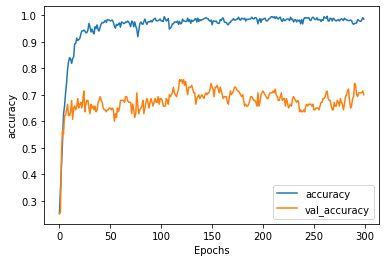

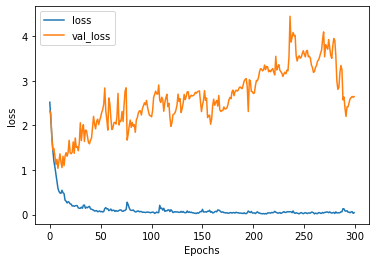

In [48]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 分析給出 3 個最可能結果

In [49]:
import heapq
top_three_lstm = []
sentences_probabilities = modelLSTM.predict(testing_padded)
for sentence_probablities in sentences_probabilities:
    sentence_top_three = heapq.nlargest(3, zip(sentence_probablities.tolist(), list(range(len(sentence_probablities.tolist())))))
    temp = []
    for i in sentence_top_three:
        temp.append(i[1])
    top_three_lstm.append(temp)
print(top_three_lstm)

[[4, 14, 10], [14, 4, 9], [1, 4, 11], [4, 1, 10], [3, 12, 13], [11, 7, 14], [1, 7, 4], [0, 8, 6], [7, 11, 1], [11, 8, 1], [10, 0, 8], [1, 7, 11], [14, 4, 9], [2, 14, 0], [2, 3, 14], [14, 8, 13], [1, 11, 7], [7, 1, 14], [1, 4, 2], [10, 4, 9], [11, 1, 5], [2, 14, 3], [11, 8, 14], [11, 1, 14], [2, 0, 6], [6, 5, 12], [8, 0, 7], [11, 1, 8], [2, 6, 11], [2, 3, 14], [4, 1, 10], [11, 8, 14], [1, 4, 14], [9, 10, 4], [7, 1, 11], [1, 11, 7], [7, 12, 2], [13, 8, 5], [8, 1, 11], [14, 1, 8], [2, 3, 0], [1, 7, 4], [5, 6, 12], [0, 8, 3], [11, 8, 14], [2, 6, 0], [6, 5, 12], [2, 6, 5], [6, 5, 12], [2, 14, 1], [6, 5, 12], [11, 14, 2], [1, 2, 7], [2, 3, 6], [3, 2, 12], [2, 3, 6], [10, 4, 14], [5, 6, 11], [6, 5, 12], [11, 8, 14], [8, 0, 13], [10, 4, 9], [11, 14, 8], [14, 2, 7], [12, 6, 2], [11, 1, 7], [11, 1, 8], [1, 11, 7], [1, 4, 7], [11, 14, 9], [2, 3, 14], [11, 1, 8], [2, 3, 6], [1, 14, 11], [2, 14, 3], [11, 1, 2], [1, 7, 11], [11, 7, 14], [11, 8, 14], [1, 4, 14], [7, 1, 14], [5, 6, 9], [11, 8, 14], [7

In [50]:
# 驗證正確性
correctCount = 0
falseCount = 0
for a,b in zip(testing_labels, top_three_lstm):
    if a in b:
        correctCount += 1
    else:
        falseCount += 1
print("lstm 三個選項的分類正確率為: %f " % (correctCount / (correctCount + falseCount),))

lstm 三個選項的分類正確率為: 0.857143 


In [51]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict1 = [label_index_dict[i[0]] for i in top_three_lstm]
testing_category_predict2 = [label_index_dict[i[1]] for i in top_three_lstm]
testing_category_predict3 = [label_index_dict[i[2]] for i in top_three_lstm]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER1': testing_category_predict1,
        'PREDICT_ANSWER2': testing_category_predict2,
        'PREDICT_ANSWER3': testing_category_predict3,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER1','PREDICT_ANSWER2','PREDICT_ANSWER3'])

# compare_diff_df # 完整testing dataframe

In [52]:
compare_diff_df.loc[(compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER1']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER2']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER3'])]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER1,PREDICT_ANSWER2,PREDICT_ANSWER3
301,雙幣卡 當 外幣 帳戶 扣款 不 成功 若 持卡人 有 約定 臺幣 自動 換匯 服務 何時...,信用卡,數位金融 - 行動銀行,存款帳戶,數位金融 - 數位存款帳戶
614,沒 時間 到 分行 開戶 是否 可 委託 他人 辦理,存款帳戶,數位金融 - 網路銀行,數位金融 - 網路ATM,數位金融 - 行動銀行
592,如何 了解 我 現在 的 貸款 餘額 及 繳款 狀況,貸款,信用卡,數位金融 - 網路銀行,存款帳戶
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,數位金融 - 行動銀行,數位金融 - 數位存款帳戶,行動支付 - Hami Pay
306,雙幣卡 有 哪些 回饋 優惠,信用卡,行動支付 - Hami Pay,行動支付 - Fitbit Pay,綜合對帳單
554,請問 帳單 上 有 多繳 款項 可以 退回 嗎 需要 收取 手續費 嗎,信用卡,數位金融 - 網路銀行,數位金融 - 行動銀行,基金投資
42,什麼 是 用戶 代號 和 網銀 密碼 登 入網 路 銀行 為何 這麼 麻煩,數位金融 - 網路銀行,數位金融 - 行動銀行,數位金融 - LINE個人化服務,行動支付 - Hami Pay
446,我 有 國泰 世華 銀 其他 行動 支付 服務 如 googlepaysamsungpay...,行動支付 - Hami Pay,數位金融 - LINE個人化服務,數位金融 - 行動銀行,綜合對帳單
0,完成 開戶 申請 流程 後 是否 會 提供 網銀 密碼 如何 提供,數位金融 - 數位存款帳戶,ATM相關服務,數位金融 - 網路ATM,存款帳戶
360,可以 設定 常用 的 卡片 嗎,行動支付 - Fitbit Pay,信用卡,數位金融 - 網路銀行,貸款


In [53]:
del modelLSTM

### CNN

In [54]:
# profile a single batch, e.g. the 5th batch.
tf.keras.backend.clear_session()

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
#                                                       profile_batch=5)

modelCNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5), # 關健在dropout
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(15, activation='softmax')
])

modelCNN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=8e-3),metrics=['accuracy'])

In [55]:
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 128)           10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                975       
Total params: 179,599
Trainable params: 179,599
Non-trainable params: 0
__________________________________________________

In [56]:
num_epochs = 300
beginTime = datetime.datetime.now()

history = modelCNN.fit(training_padded, training_labels, epochs=num_epochs, batch_size=32, validation_data=(testing_padded, testing_labels), verbose=2 ,)#callbacks=[lr_schedule,]) # , callbacks=[tensorboard_callback,]
endTime = datetime.datetime.now()
print("Total time is : %s" % (endTime-beginTime,))
modelCNN.save('./models/cnn_model.h5')  # 儲存模型，creates a HDF5 file 

Epoch 1/300
18/18 - 0s - loss: 2.4820 - accuracy: 0.2644 - val_loss: 2.3417 - val_accuracy: 0.2500
Epoch 2/300
18/18 - 0s - loss: 2.1908 - accuracy: 0.3040 - val_loss: 2.1356 - val_accuracy: 0.2929
Epoch 3/300
18/18 - 0s - loss: 1.7597 - accuracy: 0.4281 - val_loss: 1.8468 - val_accuracy: 0.3714
Epoch 4/300
18/18 - 0s - loss: 1.3321 - accuracy: 0.5198 - val_loss: 1.6617 - val_accuracy: 0.4214
Epoch 5/300
18/18 - 0s - loss: 1.0989 - accuracy: 0.6421 - val_loss: 1.6479 - val_accuracy: 0.5000
Epoch 6/300
18/18 - 0s - loss: 0.8865 - accuracy: 0.6942 - val_loss: 1.7578 - val_accuracy: 0.5214
Epoch 7/300
18/18 - 0s - loss: 0.6926 - accuracy: 0.7590 - val_loss: 1.8826 - val_accuracy: 0.5000
Epoch 8/300
18/18 - 0s - loss: 0.5502 - accuracy: 0.7896 - val_loss: 1.9953 - val_accuracy: 0.5286
Epoch 9/300
18/18 - 0s - loss: 0.4507 - accuracy: 0.8255 - val_loss: 1.7667 - val_accuracy: 0.5714
Epoch 10/300
18/18 - 0s - loss: 0.3537 - accuracy: 0.8597 - val_loss: 1.8630 - val_accuracy: 0.5714
Epoch 11/

18/18 - 0s - loss: 0.0610 - accuracy: 0.9820 - val_loss: 4.2401 - val_accuracy: 0.6071
Epoch 84/300
18/18 - 0s - loss: 0.0876 - accuracy: 0.9766 - val_loss: 4.5254 - val_accuracy: 0.6357
Epoch 85/300
18/18 - 0s - loss: 0.1648 - accuracy: 0.9730 - val_loss: 4.4335 - val_accuracy: 0.6000
Epoch 86/300
18/18 - 0s - loss: 0.0595 - accuracy: 0.9892 - val_loss: 4.1848 - val_accuracy: 0.6071
Epoch 87/300
18/18 - 0s - loss: 0.1285 - accuracy: 0.9694 - val_loss: 4.4182 - val_accuracy: 0.6214
Epoch 88/300
18/18 - 0s - loss: 0.2665 - accuracy: 0.9514 - val_loss: 4.1277 - val_accuracy: 0.6714
Epoch 89/300
18/18 - 0s - loss: 0.2625 - accuracy: 0.9514 - val_loss: 4.3535 - val_accuracy: 0.6643
Epoch 90/300
18/18 - 0s - loss: 0.0762 - accuracy: 0.9748 - val_loss: 3.7877 - val_accuracy: 0.6571
Epoch 91/300
18/18 - 0s - loss: 0.0291 - accuracy: 0.9874 - val_loss: 4.0946 - val_accuracy: 0.6071
Epoch 92/300
18/18 - 0s - loss: 0.0453 - accuracy: 0.9892 - val_loss: 3.9063 - val_accuracy: 0.6286
Epoch 93/300


Epoch 165/300
18/18 - 0s - loss: 0.0357 - accuracy: 0.9874 - val_loss: 4.5287 - val_accuracy: 0.7143
Epoch 166/300
18/18 - 0s - loss: 0.0284 - accuracy: 0.9928 - val_loss: 5.2377 - val_accuracy: 0.6714
Epoch 167/300
18/18 - 0s - loss: 0.0508 - accuracy: 0.9820 - val_loss: 6.0114 - val_accuracy: 0.6571
Epoch 168/300
18/18 - 0s - loss: 0.1056 - accuracy: 0.9802 - val_loss: 5.9333 - val_accuracy: 0.6714
Epoch 169/300
18/18 - 0s - loss: 0.0164 - accuracy: 0.9910 - val_loss: 6.3844 - val_accuracy: 0.6643
Epoch 170/300
18/18 - 0s - loss: 0.0527 - accuracy: 0.9856 - val_loss: 5.8297 - val_accuracy: 0.6714
Epoch 171/300
18/18 - 0s - loss: 0.0383 - accuracy: 0.9928 - val_loss: 5.7414 - val_accuracy: 0.6571
Epoch 172/300
18/18 - 0s - loss: 0.0780 - accuracy: 0.9910 - val_loss: 5.9987 - val_accuracy: 0.6786
Epoch 173/300
18/18 - 0s - loss: 0.0561 - accuracy: 0.9910 - val_loss: 5.6037 - val_accuracy: 0.6786
Epoch 174/300
18/18 - 0s - loss: 0.0781 - accuracy: 0.9874 - val_loss: 4.7987 - val_accurac

18/18 - 0s - loss: 0.0442 - accuracy: 0.9910 - val_loss: 6.9334 - val_accuracy: 0.6857
Epoch 247/300
18/18 - 0s - loss: 0.0529 - accuracy: 0.9910 - val_loss: 6.9384 - val_accuracy: 0.6929
Epoch 248/300
18/18 - 0s - loss: 0.0788 - accuracy: 0.9892 - val_loss: 6.6970 - val_accuracy: 0.6929
Epoch 249/300
18/18 - 0s - loss: 0.0198 - accuracy: 0.9910 - val_loss: 6.3504 - val_accuracy: 0.7143
Epoch 250/300
18/18 - 0s - loss: 0.0222 - accuracy: 0.9928 - val_loss: 6.3261 - val_accuracy: 0.7071
Epoch 251/300
18/18 - 0s - loss: 0.0157 - accuracy: 0.9910 - val_loss: 6.4511 - val_accuracy: 0.7143
Epoch 252/300
18/18 - 0s - loss: 0.0067 - accuracy: 0.9964 - val_loss: 6.5457 - val_accuracy: 0.7214
Epoch 253/300
18/18 - 0s - loss: 0.0123 - accuracy: 0.9946 - val_loss: 6.4134 - val_accuracy: 0.7071
Epoch 254/300
18/18 - 0s - loss: 0.1102 - accuracy: 0.9946 - val_loss: 6.5395 - val_accuracy: 0.7071
Epoch 255/300
18/18 - 0s - loss: 0.0102 - accuracy: 0.9928 - val_loss: 7.3144 - val_accuracy: 0.7071
Epoc

In [57]:
# LR調參
# 1.
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# 2.callback add lr_schedule
# 3.
# lrs = 1e-8 * (10 ** (np.arange(150) / 20))
# plt.semilogx(lrs, history.history["loss"])
# # plt.axis([1e-8, 1e-3, 0, 10])
# 4. change the learning rate by using the lowest one

### CNN - 分析預測錯誤的句子

In [58]:
y_test_predicted_cnn = []
sentences_probabilities = modelCNN.predict(testing_padded)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_cnn.append(index)
            break
y_test_predicted_cnn = np.array(y_test_predicted_cnn)
print(y_test_predicted_cnn)

[ 4  0  1  5  3  7  1  0  7 11 10  1  0 13  2  8  1  7  1 10 11  2 11  8
 14  6  8  1 11  2  4 11  1  9  7 11  7 13  8  1  2  1  5  1 11  5 11 10
  6  2  6 11 11  1  6  2  0  5 13 11  8 10  8 14  5 11 11  1  1 14  2 11
  2 14  2 11 11 11 11  4  7 11 11  7  1  6  1  1  5  2  3  7  2  5  7  1
 11  4  1 11 11  4  4  1 11  3 11 10  1 11  2  1 11 12  7 11  7 11  5  4
  8  7 10  0 11 11  5  1 14  1  1  1  0 11  4 11  6 11 11  1]


In [59]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict = [label_index_dict[i] for i in y_test_predicted_cnn]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER': testing_category_predict,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER'])

compare_diff_df

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
390,有 顯示 正確 的 讀卡機 型號 為 什麼 不能 使用 網路 atm 智慧 卡 服務 未 啟動,數位金融 - 網路ATM,數位金融 - 網路ATM
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶
46,為 什麼 國泰 世華 銀行 認證 密碼鎖 otp 是 全國 最 安全 的 網路 交易,數位金融 - 網路銀行,數位金融 - 網路銀行
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,行動支付 - Fitbit Pay
347,任何人 都 可以 在 國泰 世華 line 官方 帳號 使用 繳費 功能 嗎 有 哪些 繳...,數位金融 - LINE個人化服務,數位金融 - LINE個人化服務
...,...,...,...
519,信用卡 可用 餘額 不足 時 如何 申請 調 高 信用 額度,信用卡,信用卡
420,hamipay 交易 是否 需 螢幕 解鎖,行動支付 - Hami Pay,行動支付 - Hami Pay
517,卡片 不用 了 要 如何 辦理 停卡,信用卡,信用卡
547,我 的 帳單 上 有 溢 繳款 要 如何 處理,信用卡,信用卡


In [60]:
compare_diff_df.loc[compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER']]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,行動支付 - Fitbit Pay
615,未成年人 如何 申請 開戶,存款帳戶,數位金融 - 數位存款帳戶
301,雙幣卡 當 外幣 帳戶 扣款 不 成功 若 持卡人 有 約定 臺幣 自動 換匯 服務 何時...,信用卡,MyBill 輕鬆繳
265,電話 或 網路 銀行 預借 現金 的 撥款 時間,信用卡,數位金融 - 網路銀行
614,沒 時間 到 分行 開戶 是否 可 委託 他人 辦理,存款帳戶,數位金融 - 網路銀行
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,存款帳戶
594,什麼 是 房屋貸款 指標 利率,貸款,數位金融 - 網路銀行
442,如何 查詢 行動 卡號 即 虛擬 卡號 資料,行動支付 - Hami Pay,行動支付 - Fitbit Pay
4,數位 存款 帳戶 經審 核若 狀態 為 未 正式 啟用 或 未 正式 啟用 補傳 證件 還...,數位金融 - 數位存款帳戶,數位金融 - 網路銀行


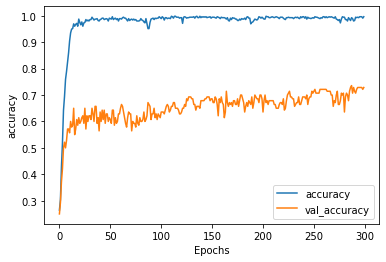

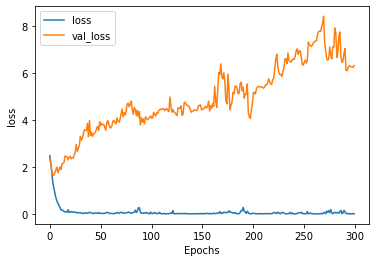

In [61]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 分析給出 3 個最可能結果

In [62]:
import heapq
top_three_cnn = []
sentences_probabilities = modelCNN.predict(testing_padded)
for sentence_probablities in sentences_probabilities:
    sentence_top_three = heapq.nlargest(3, zip(sentence_probablities.tolist(), list(range(len(sentence_probablities.tolist())))))
    temp = []
    for i in sentence_top_three:
        temp.append(i[1])
    top_three_cnn.append(temp)
print(top_three_cnn)

[[4, 14, 1], [0, 1, 10], [1, 14, 13], [5, 4, 14], [3, 13, 12], [7, 11, 8], [1, 8, 11], [0, 8, 1], [7, 8, 11], [11, 7, 1], [10, 14, 13], [1, 8, 14], [0, 14, 5], [13, 11, 14], [2, 3, 10], [8, 1, 14], [1, 8, 11], [7, 8, 1], [1, 0, 8], [10, 14, 13], [11, 14, 5], [2, 3, 14], [11, 1, 14], [8, 14, 11], [14, 5, 6], [6, 5, 10], [8, 14, 12], [1, 8, 2], [11, 7, 12], [2, 14, 13], [4, 10, 5], [11, 1, 14], [1, 8, 14], [9, 7, 12], [7, 8, 11], [11, 14, 5], [7, 12, 8], [13, 12, 14], [8, 14, 1], [1, 14, 8], [2, 3, 14], [1, 11, 8], [5, 10, 6], [1, 4, 8], [11, 14, 1], [5, 14, 6], [11, 13, 14], [10, 2, 3], [6, 5, 10], [2, 1, 3], [6, 5, 10], [11, 14, 5], [11, 1, 7], [1, 2, 4], [6, 5, 13], [2, 1, 7], [0, 4, 1], [5, 13, 6], [13, 6, 5], [11, 7, 1], [8, 14, 13], [10, 2, 3], [8, 14, 12], [14, 13, 4], [5, 4, 14], [11, 1, 12], [11, 5, 6], [1, 8, 2], [1, 11, 8], [14, 1, 11], [2, 3, 10], [11, 1, 2], [2, 3, 10], [14, 1, 11], [2, 3, 10], [11, 6, 2], [11, 14, 6], [11, 1, 7], [11, 7, 1], [4, 10, 2], [7, 11, 1], [11, 14,

In [63]:
# 驗證正確性
correctCount = 0
falseCount = 0
for a,b in zip(testing_labels, top_three_cnn):
    if a in b:
        correctCount += 1
    else:
        falseCount += 1
print("cnn 三個選項的分類正確率為: %f " % (correctCount / (correctCount + falseCount),))

cnn 三個選項的分類正確率為: 0.871429 


In [64]:
testing_category = [label_index_dict[i] for i in testing_labels]
testing_category_predict1 = [label_index_dict[i[0]] for i in top_three_cnn]
testing_category_predict2 = [label_index_dict[i[1]] for i in top_three_cnn]
testing_category_predict3 = [label_index_dict[i[2]] for i in top_three_cnn]

compare_data = {'QUESTION_SPLIT':  testing_sentences,
        'CORRECT_ANSWER': testing_category,
        'PREDICT_ANSWER1': testing_category_predict1,
        'PREDICT_ANSWER2': testing_category_predict2,
        'PREDICT_ANSWER3': testing_category_predict3,
        }

compare_diff_df = pd.DataFrame(compare_data, columns = ['QUESTION_SPLIT','CORRECT_ANSWER','PREDICT_ANSWER1','PREDICT_ANSWER2','PREDICT_ANSWER3'])

# compare_diff_df # 完整testing dataframe

In [65]:
compare_diff_df.loc[(compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER1']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER2']) & (compare_diff_df['CORRECT_ANSWER'] != compare_diff_df['PREDICT_ANSWER3'])]

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER1,PREDICT_ANSWER2,PREDICT_ANSWER3
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶,數位金融 - 網路銀行,ATM相關服務
614,沒 時間 到 分行 開戶 是否 可 委託 他人 辦理,存款帳戶,數位金融 - 網路銀行,數位金融 - 數位存款帳戶,貸款
489,存款 機 是否 有 存入 的 金額 限制,ATM相關服務,存款帳戶,行動支付 - Fitbit Pay,行動支付 - Hami Pay
4,數位 存款 帳戶 經審 核若 狀態 為 未 正式 啟用 或 未 正式 啟用 補傳 證件 還...,數位金融 - 數位存款帳戶,數位金融 - 網路銀行,數位金融 - 網路ATM,貸款
23,為何 無法 成功 使用 行動 裝置 進行 證件 上傳,數位金融 - 數位存款帳戶,行動支付 - Fitbit Pay,存款帳戶,行動支付 - Hami Pay
384,fitbitapp 顯示 之 交易 紀錄 與 實際 不符 怎麼辦,行動支付 - Fitbit Pay,ATM相關服務,數位金融 - 行動銀行,數位金融 - LINE個人化服務
279,i刷 金融卡 可以 動用 保單 貸款 嗎,信用卡,貸款,存款帳戶,綜合對帳單
139,若 密碼 輸入 正確 但 無法 成功 完成 交易,數位金融 - 行動銀行,行動支付 - Fitbit Pay,數位金融 - 網路ATM,存款帳戶
589,我 的 金融卡 掛失 了 要 如何 補發,ATM相關服務,信用卡,行動支付 - Hami Pay,數位金融 - 行動銀行
425,如何 查詢 裝置 是否 有 nfc 功能 是否 須開啟,行動支付 - Hami Pay,信用卡,存款帳戶,數位金融 - 網路銀行


In [66]:
# compare_diff_df.loc[[512,692,673,192,239,596,427,58,209,84]].rename(columns={
#     "QUESTION_SPLIT": "輸入的句子", "CORRECT_ANSWER": "正確分類", 
#     "PREDICT_ANSWER1": "預測分類1", "PREDICT_ANSWER2": "預測分類2", 
#     "PREDICT_ANSWER3": "預測分類3"})

In [67]:
compare_diff_df

,QUESTION_SPLIT,CORRECT_ANSWER,PREDICT_ANSWER1,PREDICT_ANSWER2,PREDICT_ANSWER3
390,有 顯示 正確 的 讀卡機 型號 為 什麼 不能 使用 網路 atm 智慧 卡 服務 未 啟動,數位金融 - 網路ATM,數位金融 - 網路ATM,存款帳戶,數位金融 - 網路銀行
617,未成年人 帳戶 開戶 時 小孩 及 父母 是否 應 同時 到 分行,存款帳戶,數位金融 - 數位存款帳戶,數位金融 - 網路銀行,ATM相關服務
46,為 什麼 國泰 世華 銀行 認證 密碼鎖 otp 是 全國 最 安全 的 網路 交易,數位金融 - 網路銀行,數位金融 - 網路銀行,存款帳戶,MyBill 輕鬆繳
416,晶片 金融卡 哪裡 申請,數位金融 - 網路ATM,行動支付 - Fitbit Pay,數位金融 - 網路ATM,存款帳戶
347,任何人 都 可以 在 國泰 世華 line 官方 帳號 使用 繳費 功能 嗎 有 哪些 繳...,數位金融 - LINE個人化服務,數位金融 - LINE個人化服務,MyBill 輕鬆繳,綜合對帳單
...,...,...,...,...,...
519,信用卡 可用 餘額 不足 時 如何 申請 調 高 信用 額度,信用卡,信用卡,綜合對帳單,數位金融 - 網路銀行
420,hamipay 交易 是否 需 螢幕 解鎖,行動支付 - Hami Pay,行動支付 - Hami Pay,ATM相關服務,數位金融 - LINE個人化服務
517,卡片 不用 了 要 如何 辦理 停卡,信用卡,信用卡,基金投資,數位金融 - 網路銀行
547,我 的 帳單 上 有 溢 繳款 要 如何 處理,信用卡,信用卡,數位金融 - 網路銀行,基金投資


In [68]:
del modelCNN

### 集成式學習(取nn、LSTM、CNN)三個神經網路共同決策出三個最可能的結果

In [69]:
top_three_ensemble = []
for a, b, c in zip(top_three_nn, top_three_lstm, top_three_cnn):
    temp = []
    for index in range(3):
        temp.extend([b[index], c[index], a[index]])
    print(temp)
    uniq = []
    [uniq.append(x) for x in temp if x not in uniq]
#     print(uniq[:3])
    top_three_ensemble.append(uniq[:3])
# print(top_three_ensemble)

[4, 4, 4, 14, 14, 1, 10, 1, 10]
[14, 0, 0, 4, 1, 14, 9, 10, 7]
[1, 1, 1, 4, 14, 4, 11, 13, 2]
[4, 5, 14, 1, 4, 1, 10, 14, 4]
[3, 3, 13, 12, 13, 3, 13, 12, 4]
[11, 7, 7, 7, 11, 11, 14, 8, 14]
[1, 1, 1, 7, 8, 11, 4, 11, 7]
[0, 0, 0, 8, 8, 10, 6, 1, 14]
[7, 7, 7, 11, 8, 11, 1, 11, 1]
[11, 11, 11, 8, 7, 8, 1, 1, 7]
[10, 10, 10, 0, 14, 14, 8, 13, 4]
[1, 1, 1, 7, 8, 4, 11, 14, 2]
[14, 0, 14, 4, 14, 0, 9, 5, 9]
[2, 13, 11, 14, 11, 8, 0, 14, 7]
[2, 2, 2, 3, 3, 10, 14, 10, 5]
[14, 8, 8, 8, 1, 14, 13, 14, 1]
[1, 1, 1, 11, 8, 11, 7, 11, 4]
[7, 7, 7, 1, 8, 14, 14, 1, 1]
[1, 1, 14, 4, 0, 8, 2, 8, 11]
[10, 10, 10, 4, 14, 0, 9, 13, 14]
[11, 11, 11, 1, 14, 1, 5, 5, 6]
[2, 2, 2, 14, 3, 10, 3, 14, 1]
[11, 11, 11, 8, 1, 1, 14, 14, 7]
[11, 8, 11, 1, 14, 8, 14, 11, 1]
[2, 14, 14, 0, 5, 0, 6, 6, 9]
[6, 6, 6, 5, 5, 9, 12, 10, 5]
[8, 8, 8, 0, 14, 9, 7, 12, 14]
[11, 1, 1, 1, 8, 11, 8, 2, 4]
[2, 11, 11, 6, 7, 8, 11, 12, 1]
[2, 2, 2, 3, 14, 10, 14, 13, 14]
[4, 4, 4, 1, 10, 1, 10, 5, 10]
[11, 11, 11, 8, 1, 8, 14,

In [70]:
# 驗證正確性
correctCount = 0
falseCount = 0
for a,b in zip(testing_labels, top_three_ensemble):
    if a in b:
        correctCount += 1
    else:
        falseCount += 1
print("esemble learning 三個選項的分類正確率為: %f " % (correctCount / (correctCount + falseCount),))

esemble learning 三個選項的分類正確率為: 0.957143 


### 結果比較

In [71]:
# 驗證正確性
def countOneAccuracy(y_predicted_list):
    correctCount = 0
    falseCount = 0
    for a,b in zip(testing_labels, y_predicted_list):
        if a==b:
            correctCount +=1
        else:
            falseCount +=1
    return correctCount / (correctCount + falseCount)

# 驗證正確性
def countThreeAccuracy(y_predicted_list):
    correctCount = 0
    falseCount = 0
    for a,b in zip(testing_labels, y_predicted_list):
        if a in b:
            correctCount += 1
        else:
            falseCount += 1
    return correctCount / (correctCount + falseCount)


In [72]:
print("NN 一個選項的分類正確率為 %f" % (countOneAccuracy(y_test_predicted_nn)))
print("LSTM 一個選項的分類正確率為 %f" % (countOneAccuracy(y_test_predicted_lstm)))
print("CNN 一個選項的分類正確率為: %f" % (countOneAccuracy(y_test_predicted_cnn)))

print("NN 三個選項的分類正確率為: %f" % (countThreeAccuracy(top_three_nn)))
print("LSTM 三個選項的分類正確率為: %f" % (countThreeAccuracy(top_three_lstm)))
print("CNN 三個選項的分類正確率為: %f" % (countThreeAccuracy(top_three_cnn)))
print("Ensemble 三個選項的分類正確率為: %f" % (countThreeAccuracy(top_three_ensemble)))

NN 一個選項的分類正確率為 0.707143
LSTM 一個選項的分類正確率為 0.700000
CNN 一個選項的分類正確率為: 0.728571
NN 三個選項的分類正確率為: 0.928571
LSTM 三個選項的分類正確率為: 0.857143
CNN 三個選項的分類正確率為: 0.871429
Ensemble 三個選項的分類正確率為: 0.957143


## 驗證與測試

### 語音檔(.wav)、語音轉成文字

In [73]:
import speech_recognition as sr
r = sr.Recognizer()                        #預設辨識英文
with sr.WavFile("語音檔\\信用卡 001.wav") as source:  #讀取wav檔
    audio = r.record(source)
try:
    print("Transcription: " + r.recognize_google(audio,language="zh-TW"))
                                          #使用Google的服務
    user_sentences = r.recognize_google(audio,language="zh-TW")
except LookupError:
    print("Could not understand audio")
# 會有英文，但是沒有標點符號，注意大小寫問題

# user_sentences = "如何辦理終止個人網路銀行服務？" # from 第一銀行問題
user_sentences = '你好，我的信用卡遺失了，想要辦掛失'

Transcription: 信用卡最多可以申辦幾張


### 資料前處理 -- jieba 斷詞、去除標點符號、英文轉小寫

In [74]:
#去除標點符號、全部轉為小寫
reg = "[^0-9A-Za-z\u4e00-\u9fa5]"
user_sentences_without_punctuation = re.sub(reg,'', user_sentences)
user_sentences_without_punctuation = user_sentences_without_punctuation.lower()
print(user_sentences_without_punctuation)

# jieba
words = jieba.cut(user_sentences_without_punctuation, cut_all=False)
sentence_split = ''
for word in words:
    sentence_split += ' ' + word
user_sentences_split = sentence_split

你好我的信用卡遺失了想要辦掛失


In [75]:
print(user_sentences_split)

 你好 我 的 信用卡 遺失 了 想 要辦 掛失


### tokenlize

In [76]:
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

user_sequences = tokenizer.texts_to_sequences([user_sentences_split,])
user_padded = pad_sequences(user_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [77]:
print(user_sequences)
print(user_padded)

[[1, 9, 3, 10, 159, 52, 155, 1, 121]]
[[  1   9   3  10 159  52 155   1 121   0   0   0   0   0   0   0   0   0
    0   0]]


In [78]:
# print(testing_padded[0]) # 對應數位金融-行動銀行1.wav來檢查是否神經網路輸出正確

### NN

#### 找出可能的一個

In [79]:
# y_test_predicted_nn = ''

# # 載入模型
# model = tf.keras.models.load_model('./models/nn_model.h5')

# sentences_probabilities = model.predict(user_padded)
# print(sentences_probabilities)
# for sentence_probabilities in sentences_probabilities:
#     cur_max_sentence_prob = max(sentence_probabilities)
#     for index, q in enumerate(sentence_probabilities):
#         if q == cur_max_sentence_prob:
#             y_test_predicted_nn = index
# print(label_index_dict[y_test_predicted_nn])

In [80]:
y_test_predicted_nn = ''

# # 載入模型
model = tf.keras.models.load_model('./models/nn_model.h5')

# #https://github.com/tensorflow/tensorflow/issues/38561
@tf.function(experimental_relax_shapes=True)
def predictNN(t):
    return model(t)

# sentences_probabilities = model.predict(user_padded)
sentences_probabilities = predictNN(user_padded)
print(sentences_probabilities)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_nn = index
print(label_index_dict[y_test_predicted_nn])



tf.Tensor(
[[3.9149811e-07 4.5985269e-04 2.6554354e-09 4.4520037e-11 2.1842991e-04
  2.9499228e-07 8.2316192e-06 4.2445686e-07 2.3737538e-03 1.9475409e-03
  4.1395185e-07 7.6797105e-06 8.2461270e-07 2.8343307e-05 9.9495381e-01]], shape=(1, 15), dtype=float32)
存款帳戶


#### 找出最可能的3個

In [81]:
import heapq

sentences_top_three = heapq.nlargest(3, zip(sentences_probabilities[0], list(range(len(sentences_probabilities[0])))))
print(sentences_top_three)
top_three_nn = []
for i in sentences_top_three:
    top_three_nn.append(label_index_dict[i[1]])
print(top_three_nn)

[(<tf.Tensor: shape=(), dtype=float32, numpy=0.9949538>, 14), (<tf.Tensor: shape=(), dtype=float32, numpy=0.0023737538>, 8), (<tf.Tensor: shape=(), dtype=float32, numpy=0.0019475409>, 9)]
['存款帳戶', '貸款', '信託']


### LSTM 

#### 找出可能的一個

In [82]:
y_test_predicted_lstm = ''

# 載入模型
# modelLSTM = tf.keras.models.load_model('./models/lstm_model.h5')
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.75), # 關健在dropout
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])
modelLSTM.load_weights('./models/lstm_model.h5')

# #https://github.com/tensorflow/tensorflow/issues/38561
@tf.function(experimental_relax_shapes=True)
def predictLSTM(t):
    return modelLSTM(t)

# sentences_probabilities = model.predict(user_padded)
sentences_probabilities = predictLSTM(user_padded)
print(sentences_probabilities)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_lstm = index
print(label_index_dict[y_test_predicted_lstm])

tf.Tensor(
[[1.08931526e-04 1.76773005e-06 6.86727435e-06 5.92071059e-10
  1.08591985e-05 1.61912412e-05 1.51879276e-05 5.60192632e-07
  2.38215461e-01 4.44315607e-04 7.11140633e-01 4.78570722e-02
  3.92363697e-09 1.50783153e-05 2.16698716e-03]], shape=(1, 15), dtype=float32)
ATM相關服務


#### 找出可能的3個

In [83]:
import heapq

sentences_top_three = heapq.nlargest(3, zip(sentences_probabilities[0], list(range(len(sentences_probabilities[0])))))
print(sentences_top_three)
top_three_lstm = []
for i in sentences_top_three:
    top_three_lstm.append(label_index_dict[i[1]])
print(top_three_lstm)

[(<tf.Tensor: shape=(), dtype=float32, numpy=0.71114063>, 10), (<tf.Tensor: shape=(), dtype=float32, numpy=0.23821546>, 8), (<tf.Tensor: shape=(), dtype=float32, numpy=0.047857072>, 11)]
['ATM相關服務', '貸款', '信用卡']


### CNN

#### 找出可能的一個

In [84]:
y_test_predicted_cnn = ''

# 載入模型
modelCNN = tf.keras.models.load_model('./models/cnn_model.h5')

# #https://github.com/tensorflow/tensorflow/issues/38561
@tf.function(experimental_relax_shapes=True)
def predictCNN(t):
    return modelCNN(t)

# for t in predict_tensors:
#     _ = predict(t)

# sentences_probabilities = model.predict(user_padded)
sentences_probabilities = predictCNN(user_padded)

print(sentences_probabilities)
for sentence_probabilities in sentences_probabilities:
    cur_max_sentence_prob = max(sentence_probabilities)
    for index, q in enumerate(sentence_probabilities):
        if q == cur_max_sentence_prob:
            y_test_predicted_cnn = index
print(label_index_dict[y_test_predicted_cnn])

tf.Tensor(
[[5.4425560e-04 8.1457720e-06 5.8503205e-01 1.5169899e-01 1.3242280e-03
  1.0059017e-03 9.2029804e-04 1.6033836e-03 6.2757493e-08 1.7859558e-05
  2.5784138e-01 1.1409757e-06 1.7104699e-06 5.7574766e-07 1.9043782e-08]], shape=(1, 15), dtype=float32)
數位金融 - 行動銀行


#### 找出最可能的3個

In [85]:
import heapq

sentences_top_three = heapq.nlargest(3, zip(sentences_probabilities[0], list(range(len(sentences_probabilities[0])))))
print(sentences_top_three)
top_three_cnn = []
for i in sentences_top_three:
    top_three_cnn.append(label_index_dict[i[1]])
print(top_three_cnn)

[(<tf.Tensor: shape=(), dtype=float32, numpy=0.58503205>, 2), (<tf.Tensor: shape=(), dtype=float32, numpy=0.25784138>, 10), (<tf.Tensor: shape=(), dtype=float32, numpy=0.15169899>, 3)]
['數位金融 - 行動銀行', 'ATM相關服務', '數位金融 - LINE個人化服務']


### 集成式學習(取nn、LSTM、CNN)三個神經網路共同決策出三個最可能的結果

In [86]:
temp = []
for index in range(3):
    temp.extend([top_three_lstm[index], top_three_cnn[index], top_three_nn[index]])
uniq = []
[uniq.append(x) for x in temp if x not in uniq]
top_three_ensemble = uniq[:3]

print(top_three_ensemble)

['ATM相關服務', '數位金融 - 行動銀行', '存款帳戶']


In [87]:
# tensorboard --logdir=./logs